<a href="https://colab.research.google.com/github/srivani47/EcoForecast-AI-Powered-Prediction-of-Carbon-Monoxide-Levels/blob/main/Model%20testing%20file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("/content/arduino_data.csv")
data

,timestamp,temp,humidity,ppm
0,2023-06-09T10:46:48+05:30,38,38,24.01
1,2023-06-09T10:47:49+05:30,38,36,22.39
2,2023-06-09T10:48:49+05:30,38,36,21.62
3,2023-06-09T10:49:50+05:30,38,36,21.62
4,2023-06-09T10:50:50+05:30,38,36,21.62
...,...,...,...,...
10303,2023-06-17T02:51:13+05:30,28,32,25.71
10304,2023-06-17T02:52:13+05:30,28,32,25.71
10305,2023-06-17T02:53:14+05:30,28,32,25.71
10306,2023-06-17T02:54:14+05:30,28,32,28.43


In [ ]:
data.head()

,timestamp,temp,humidity,ppm
0,2023-06-09T10:46:48+05:30,38,38,24.01
1,2023-06-09T10:47:49+05:30,38,36,22.39
2,2023-06-09T10:48:49+05:30,38,36,21.62
3,2023-06-09T10:49:50+05:30,38,36,21.62
4,2023-06-09T10:50:50+05:30,38,36,21.62


In [ ]:
data.shape

(10308, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10308 entries, 0 to 10307
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  10308 non-null  object 
 1   temp       10308 non-null  int64  
 2   humidity   10308 non-null  int64  
 3   ppm        10308 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 322.2+ KB


In [ ]:
data.isnull().sum()

timestamp    0
temp         0
humidity     0
ppm          0
dtype: int64

In [ ]:
data['timestamp']=pd.to_datetime(data['timestamp'])
data.dtypes

timestamp    datetime64[ns, UTC+05:30]
temp                             int64
humidity                         int64
ppm                            float64
dtype: object

In [ ]:
#statistical information about dataset
data.describe()

,temp,humidity,ppm
count,10308.000000,10308.000000,10308.000000
mean,38.297051,32.617288,39.145906
std,4.053829,5.793688,18.363310
min,28.000000,21.000000,11.270000
25%,35.000000,29.000000,24.850000
50%,39.000000,32.000000,34.520000
75%,41.000000,36.000000,49.670000
max,45.000000,55.000000,328.600000


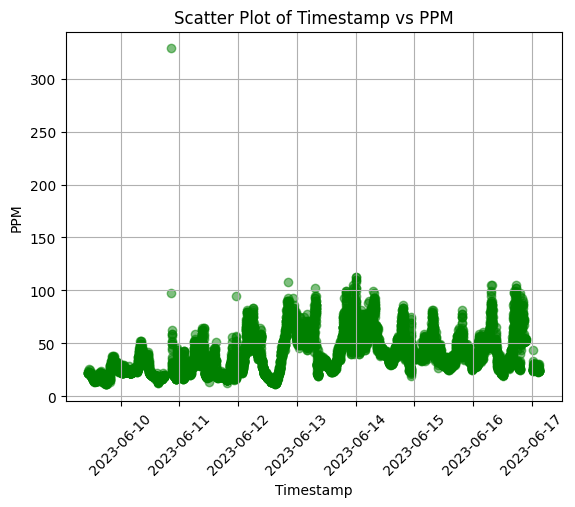

In [ ]:
plt.scatter(data['timestamp'],data['ppm'],color='green',alpha=0.5)
plt.title('Scatter Plot of Timestamp vs PPM')
plt.xlabel('Timestamp')
plt.ylabel('PPM')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

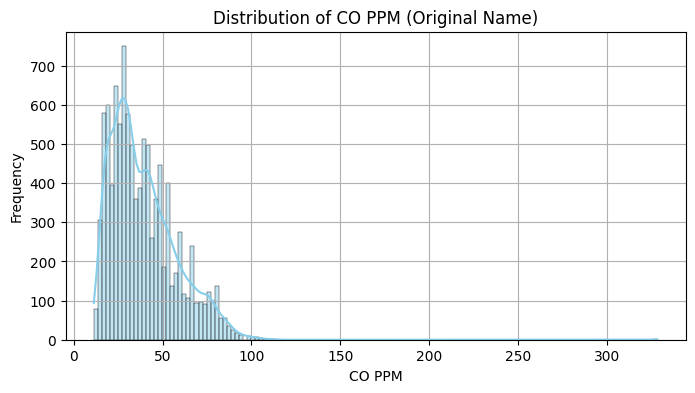

In [ ]:
#Histogram
plt.figure(figsize=(8,4))
sns.histplot(data['ppm'], kde=True, color='skyblue')
plt.title('Distribution of CO PPM (Original Name)')
plt.xlabel('CO PPM')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<Axes: ylabel='humidity'>

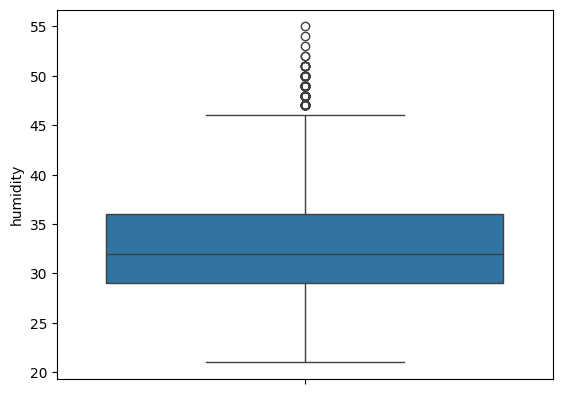

In [ ]:
sns.boxplot(data.humidity)

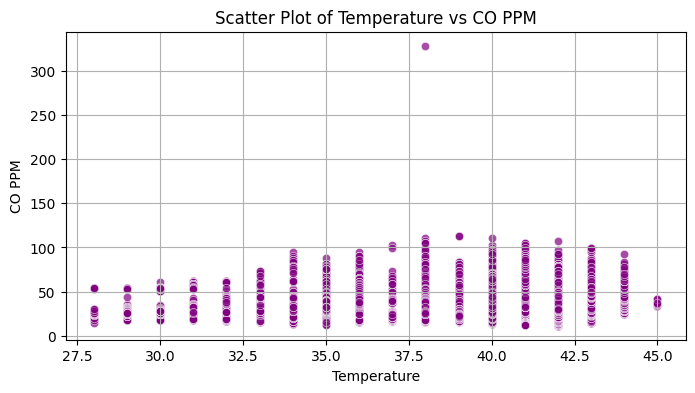

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='temp', y='ppm', data=data, color='purple', alpha=0.7)
plt.title('Scatter Plot of Temperature vs CO PPM')
plt.xlabel('Temperature')
plt.ylabel('CO PPM')
plt.grid(True)
plt.show()


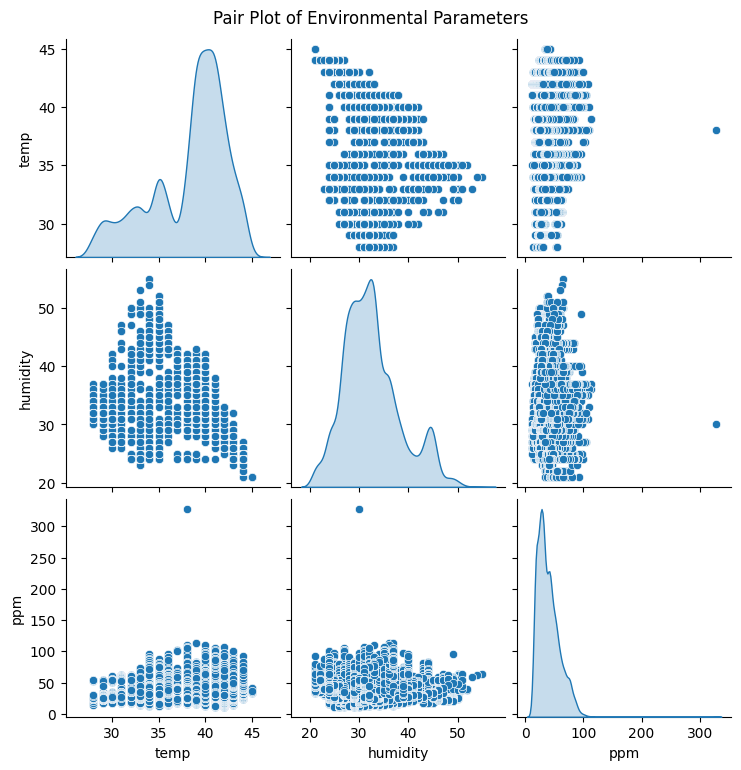

In [ ]:
sns.pairplot(data,diag_kind='kde')
plt.suptitle('Pair Plot of Environmental Parameters',y=1.02)
plt.show()


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['timestamp']=label_encoder.fit_transform(data['timestamp'])
data['timestamp'].unique()

array([    0,     1,     2, ..., 10305, 10306, 10307])

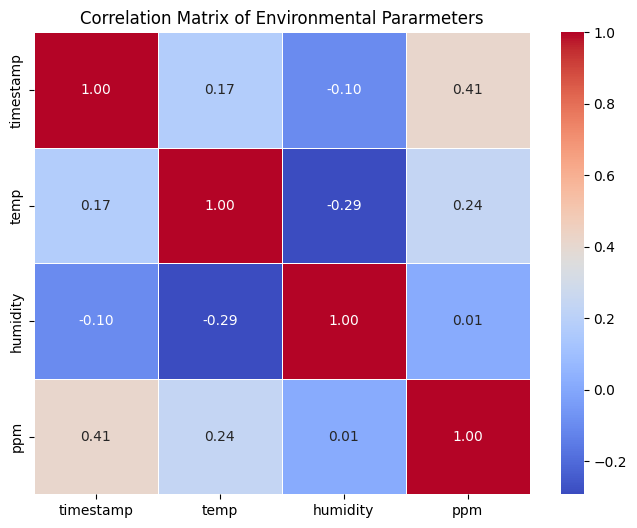

In [ ]:
correlation_matrix=data.corr()

#Heatmap of Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Environmental Pararmeters')
plt.show()

In [ ]:
quant=data['humidity'].quantile(q=[0.75,0.25])

print(quant)

Q3=quant.loc[0.75]

print(Q3)

Q1=quant.loc[0.25]

print(Q1)

IQR=Q3-Q1

print(IQR)

maxwhisker=Q3+1.5*IQR

print(maxwhisker)

minwhisker=Q1-1.5*IQR

print(minwhisker)

0.75    36.0
0.25    29.0
Name: humidity, dtype: float64
36.0
29.0
7.0
46.5
18.5


<Axes: ylabel='humidity'>

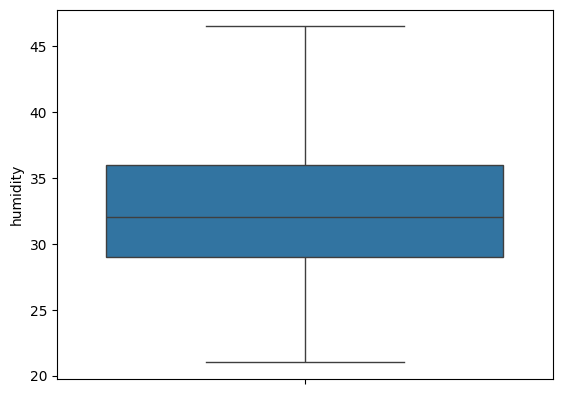

In [ ]:
data['humidity']=np.where (data['humidity']>46.5,46.5, data['humidity'])

sns.boxplot(data['humidity'])

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extracting year, month, and day

data['Year'] = data['timestamp'].dt.year

data ['Month'] = data['timestamp'].dt.month

data['Day'] = data['timestamp'].dt.day

data['Hour'] = data['timestamp'].dt.hour

# Display the modified DataFrame

print(data[['timestamp', 'Year', 'Month', 'Day', 'Hour', 'temp', 'humidity', 'ppm']])

                          timestamp  Year  Month  Day  Hour  temp  humidity  \
0     1970-01-01 00:00:00.000000000  1970      1    1     0    38      38.0   
1     1970-01-01 00:00:00.000000001  1970      1    1     0    38      36.0   
2     1970-01-01 00:00:00.000000002  1970      1    1     0    38      36.0   
3     1970-01-01 00:00:00.000000003  1970      1    1     0    38      36.0   
4     1970-01-01 00:00:00.000000004  1970      1    1     0    38      36.0   
...                             ...   ...    ...  ...   ...   ...       ...   
10303 1970-01-01 00:00:00.000010303  1970      1    1     0    28      32.0   
10304 1970-01-01 00:00:00.000010304  1970      1    1     0    28      32.0   
10305 1970-01-01 00:00:00.000010305  1970      1    1     0    28      32.0   
10306 1970-01-01 00:00:00.000010306  1970      1    1     0    28      32.0   
10307 1970-01-01 00:00:00.000010307  1970      1    1     0    28      32.0   

         ppm  
0      24.01  
1      22.39  
2     

In [ ]:
#splitting independent and dependent variables
x = data[['Year', 'Month', 'Day', 'Hour', 'temp', 'humidity']]

y = data['ppm']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
data_numeric=data.filter(["temp","humidity","ppm"],axis=1)
data_numeric.head()

,temp,humidity,ppm
0,38,38.0,24.01
1,38,36.0,22.39
2,38,36.0,21.62
3,38,36.0,21.62
4,38,36.0,21.62


In [ ]:
#Training And Testing The Models Using Multiple Algorithms

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([27.84091335, 43.76665499, 42.59928002, ..., 43.3138313 ,
       27.79729208, 42.41648943])

In [ ]:
print("Training Accuracy=",lr.score(x_train,y_train))
print("Test Accuracy=",lr.score(x_test,y_test))

Training Accuracy= 0.06503968505710755
Test Accuracy= 0.061523854715849424


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
lr_r2score=r2_score(y_test,y_pred)
print("R_squared=",lr_r2score)

R_squared= 0.061523854715849424


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=20, random_state = 0)
RFR.fit(x_train,y_train)
y_pred1=RFR.predict(x_test)
RFR_r2score = r2_score(y_test,y_pred1)


In [ ]:
from sklearn import metrics
print('R_squared:', RFR_r2score)


R_squared: 0.36726404580326355


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Training Accuracy", RFR.score(x_train,y_train))
print("Test Accuracy=", RFR.score(x_test,y_test))

Training Accuracy 0.4102458601234813
Test Accuracy= 0.36726404580326355


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred1))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred1))
print("R-squared:", r2_score(y_test, y_pred1))

Mean Absolute Error: 10.302987974327529
Mean Squared Error: 205.6867413424404
R-squared: 0.36726404580326355


In [ ]:
classification_report(y_test, y_pred1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

DTR. fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred2=DTR.predict(x_test)
y_pred2

array([27.3       , 36.26666667, 24.00380952, ..., 50.66142857,
       25.68521739, 52.75860082])

In [ ]:
DTR_r2score=r2_score(y_test,y_pred2)
print("R-squared:",DTR_r2score)

R-squared: 0.368581227731857


In [ ]:
print("Training Accuracy=",DTR.score(x_train,y_train))
print("Test Accuracy=",DTR.score(x_test,y_test))

Training Accuracy= 0.4111602033098315
Test Accuracy= 0.368581227731857


In [ ]:
import xgboost as xgb

regressor = xgb.XGBRegressor (n_estimators=100, learning_rate=0.1, max_depth=3, objective='reg:squarederror', random_state=0)
regressor.fit(x_train, y_train)
y_pred4=regressor.predict(x_test)
XGB_r2score=r2_score(y_test, y_pred4)
print("R-squared:", XGB_r2score)



R-squared: 0.27036413286966887


In [ ]:
print("Training Accuracy", regressor.score(x_train,y_train))
print("Test Accuracy", regressor.score(x_test,y_test))



Training Accuracy 0.29635162610429255
Test Accuracy 0.27036413286966887


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
knn_regressor = KNeighborsRegressor(n_neighbors=15)
knn_regressor.fit(x_train, y_train)
y_pred5 = knn_regressor.predict(x_test)
KNN_r2score = r2_score(y_test, y_pred5)
print("R-squared:", KNN_r2score)



R-squared: 0.32659350142943666


In [ ]:
print("Training Accuracy= ", knn_regressor.score(x_train,y_train))
print("Test Accuracy= ", knn_regressor.score(x_test,y_test))


Training Accuracy=  0.3583124866059221
Test Accuracy=  0.32659350142943666


In [ ]:
#AccuracyScore DataFrame

accuracy_df = pd.DataFrame({'model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost', 'KNN'],
                                      'R2_score': [lr_r2score, RFR_r2score, DTR_r2score, XGB_r2score, KNN_r2score]})

accuracy_df

,model,R2_score
0,Linear Regression,0.061524
1,Decision Tree Regressor,0.367264
2,Random Forest Regressor,0.368581
3,XGBoost,0.270364
4,KNN,0.326594


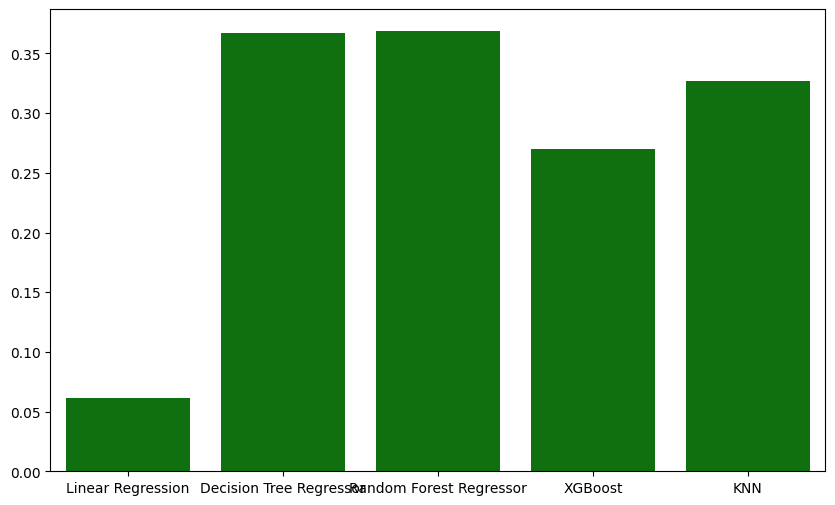

In [ ]:
#visual representation of models

model = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost', 'KNN']

R2_score = [lr_r2score, RFR_r2score, DTR_r2score, XGB_r2score, KNN_r2score]
plt.figure(figsize=(10,6))
sns.barplot(x=model,y=R2_score,color='Green')
plt.show()

In [ ]:
import pickle

pickle.dump(knn_regressor,open("kmodel.pkl","wb"))
print("pickel model downloaded successfully")

pickel model downloaded successfully


In [ ]:
#cheking with knn model
print(knn_regressor.predict(ss.transform([[38,38.0,2023,6,9,10]])))

[24.40333333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
pickle.dump(ss,open("scaler.pkl","wb"))


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
